In [1]:
df.train <- read.csv('/kaggle/input/titanic/train.csv')

In [2]:
head(df.train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


# Exploratory Data Analysis

In [3]:
install.packages('Amelia')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



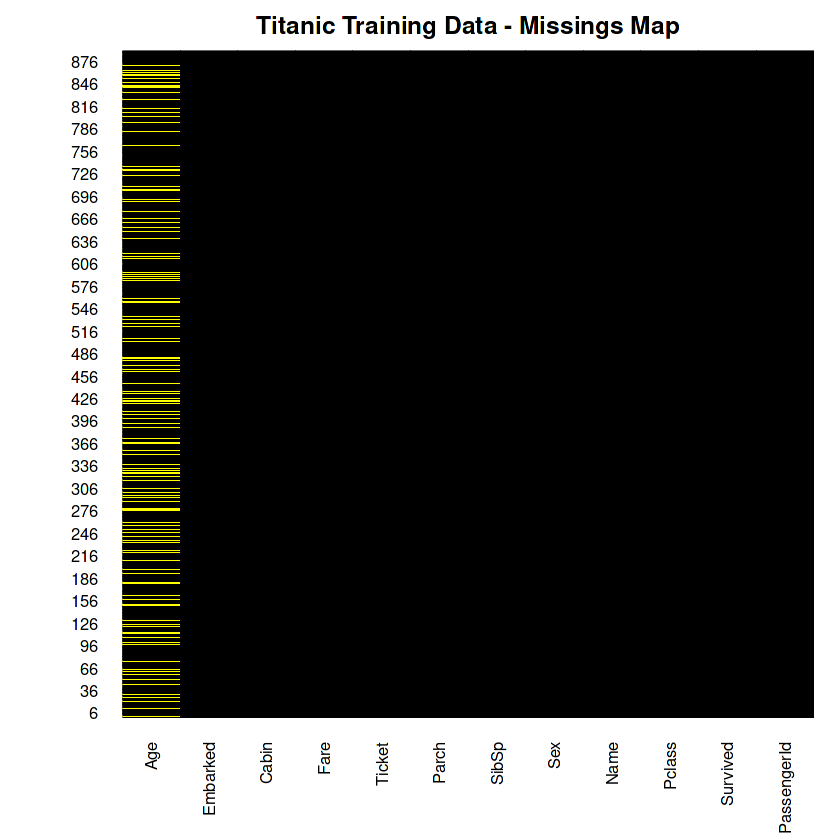

In [5]:
missmap(df.train, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

In [6]:
library(ggplot2)

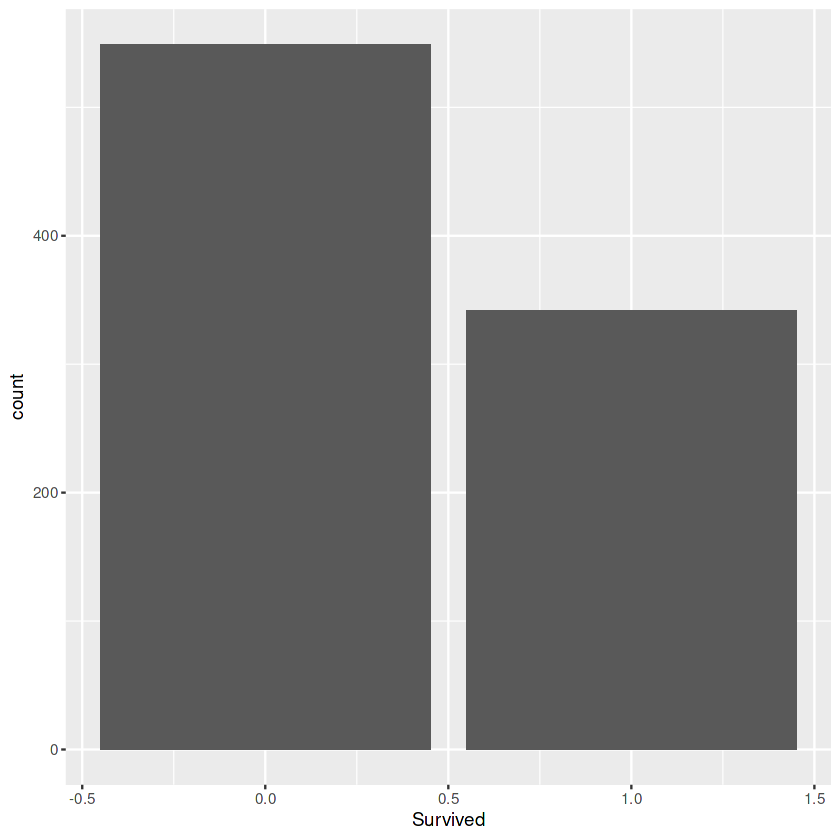

In [7]:
ggplot(df.train,aes(Survived)) + geom_bar()

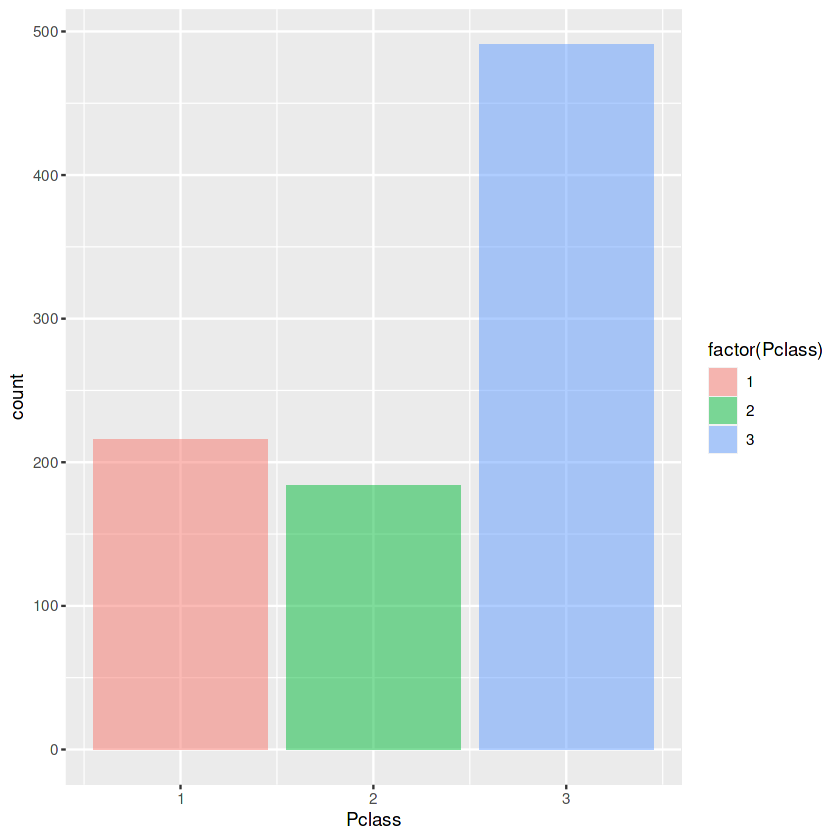

In [8]:
ggplot(df.train,aes(Pclass)) + geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

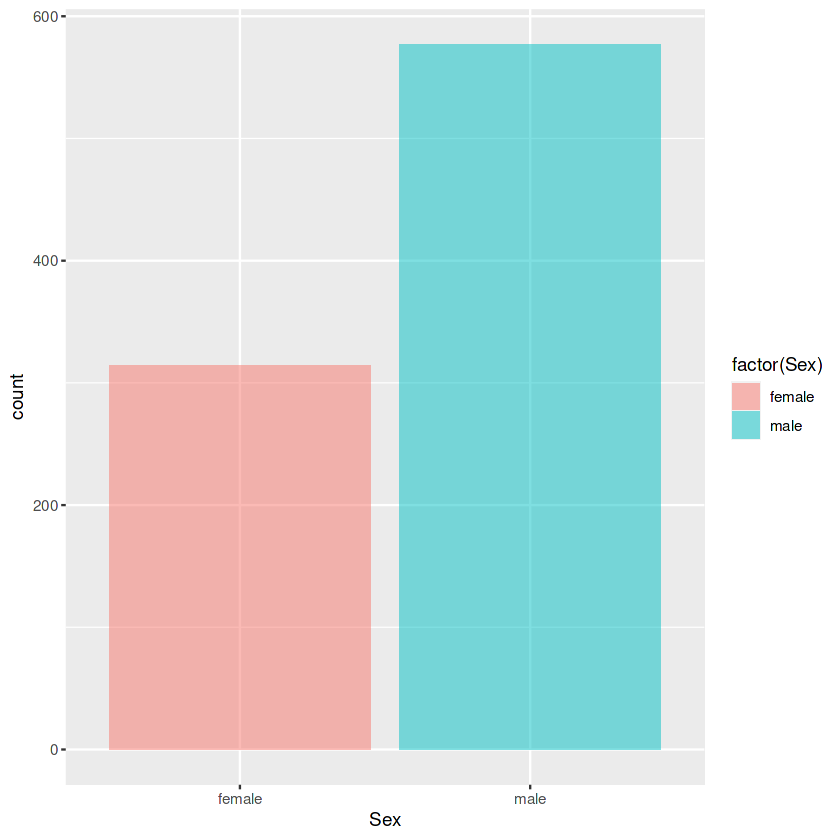

In [9]:
ggplot(df.train,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

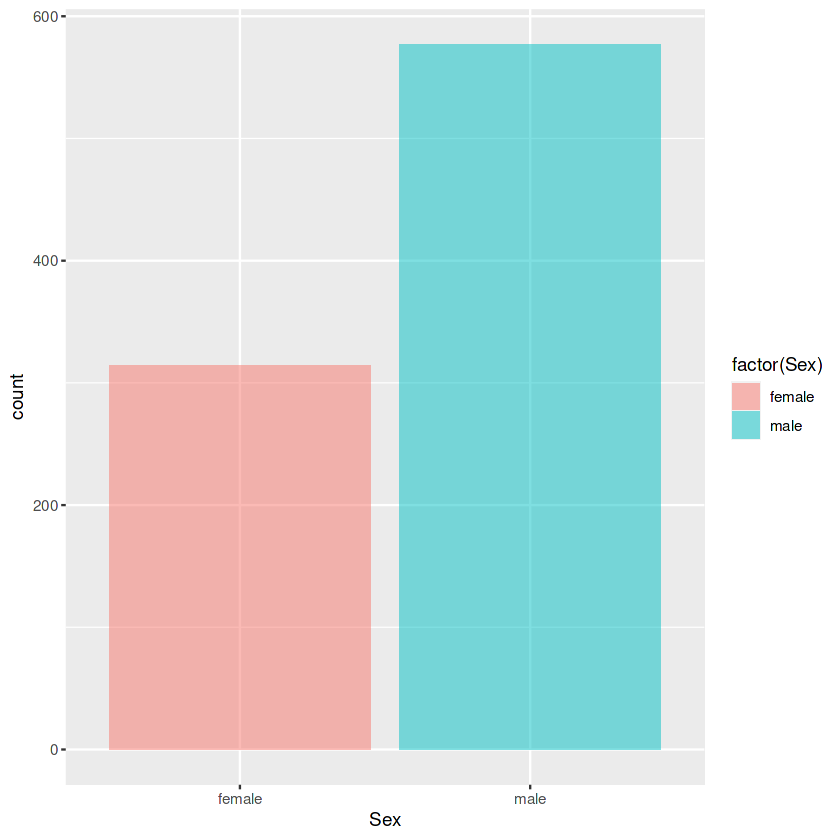

In [10]:
ggplot(df.train,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

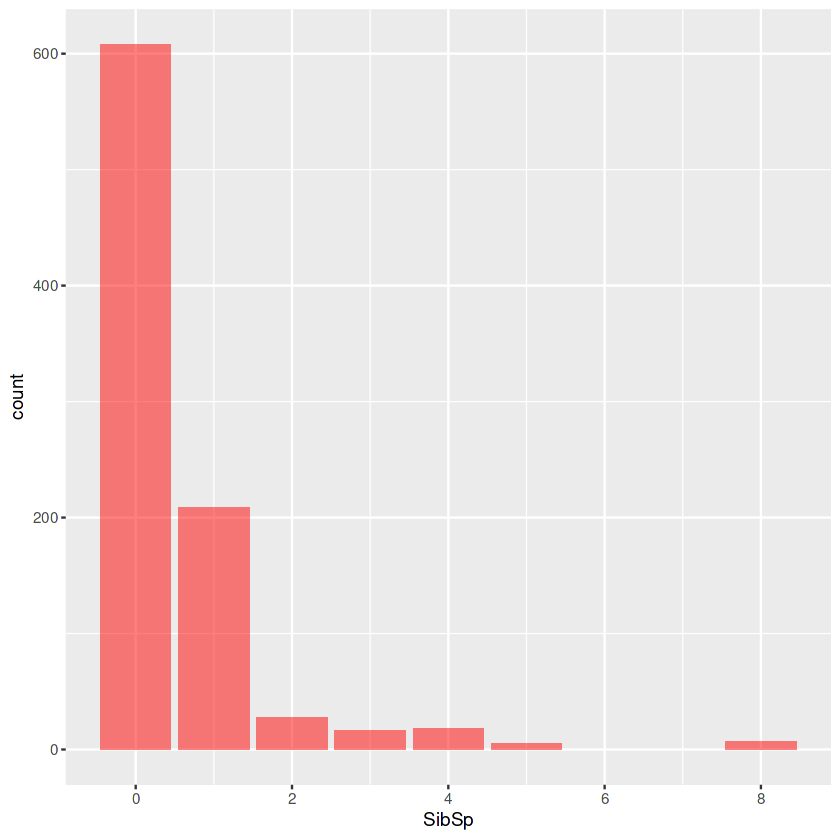

In [11]:
ggplot(df.train,aes(SibSp)) + geom_bar(fill='red',alpha=0.5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


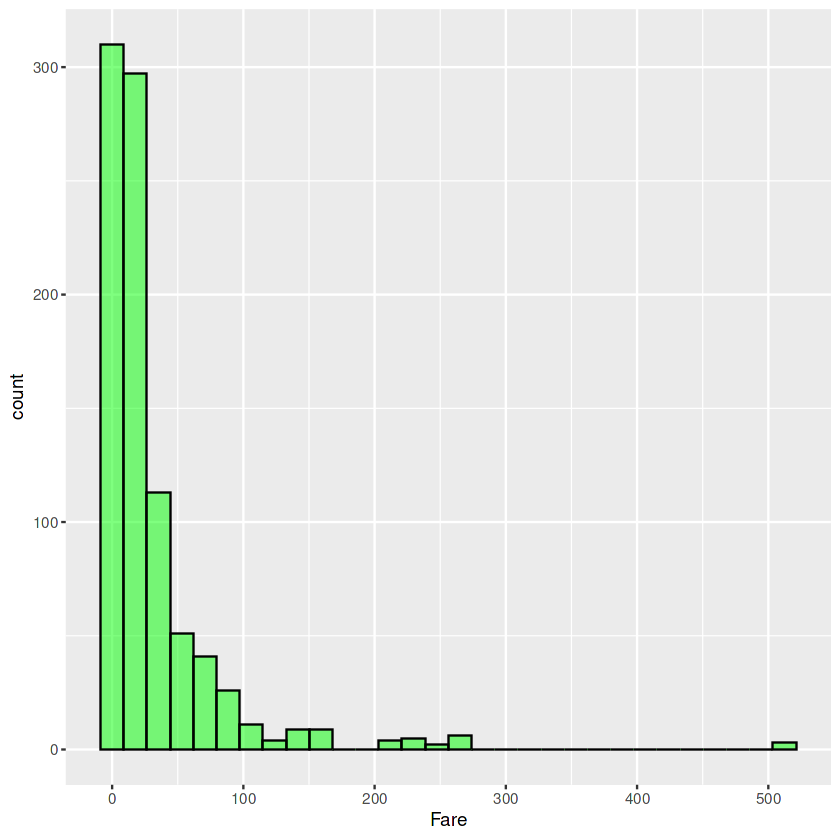

In [12]:
ggplot(df.train,aes(Fare)) + geom_histogram(fill='green',color='black',alpha=0.5)

# Data Cleaning

Warning message:
“Removed 177 rows containing non-finite values (`stat_boxplot()`).”


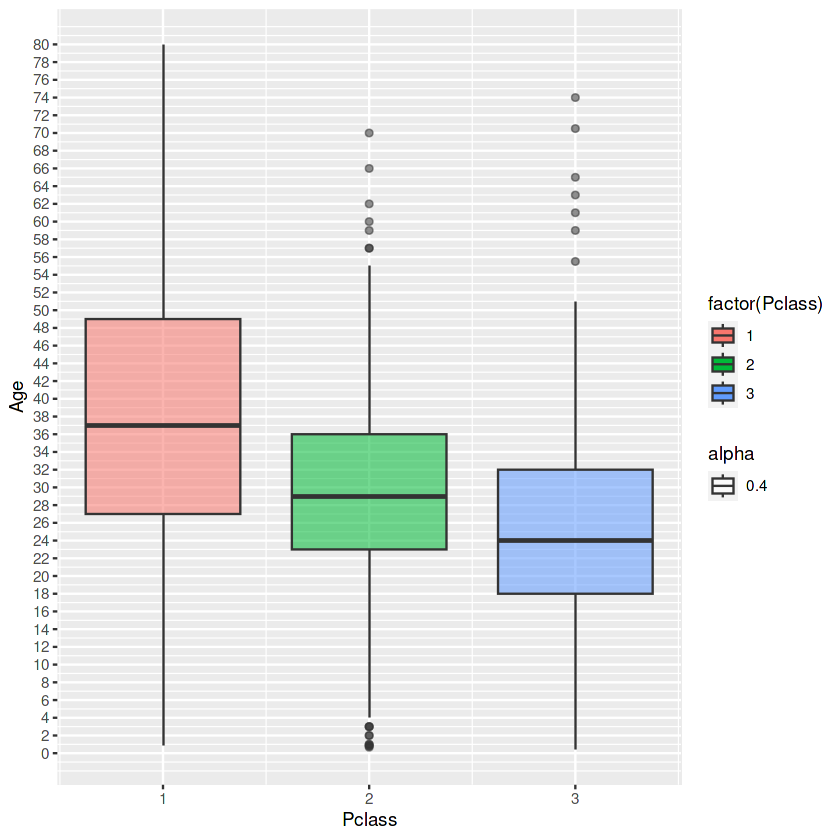

In [13]:
pl <- ggplot(df.train,aes(Pclass,Age)) + geom_boxplot(aes(group=Pclass,fill=factor(Pclass),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

**We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.**

In [14]:
impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [15]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)

In [17]:
df.train$Age <- fixed.ages

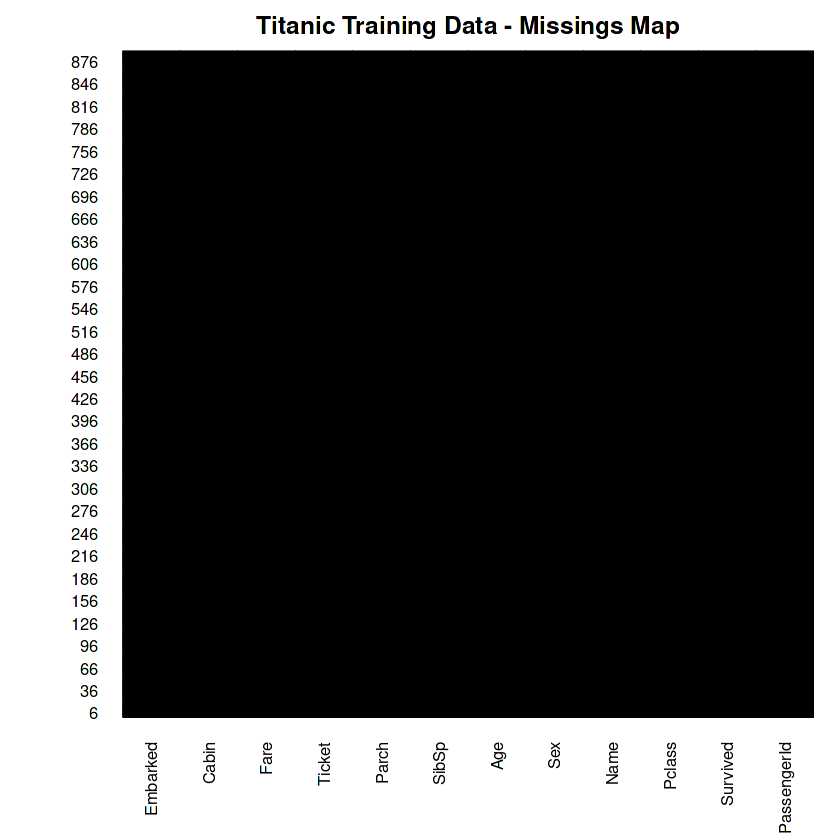

In [18]:
missmap(df.train, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

# Building a Logistic Regression Model

In [19]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [20]:
head(df.train,3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


In [21]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [22]:
df.train <- select(df.train,-PassengerId,-Name,-Ticket,-Cabin)
head(df.train,3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S


In [23]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...


In [24]:
df.train$Survived <- factor(df.train$Survived)
df.train$Pclass <- factor(df.train$Pclass)
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

# Train the Model

In [25]:
log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = df.train)

In [26]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6134  -0.4138   0.5808   2.4896  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.845e+01  1.660e+03   0.011 0.991134    
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp1       8.135e-02  2.245e-01   0.362 0.717133    
SibSp2      -2.897e-01  5.368e-01  -0.540 0.589361    
SibSp3      -2.241e+00  7.202e-01  -3.111 0.001862 ** 
SibSp4      -1.675e+00  7.620e-01  -2.198 0.027954 *  
SibSp5      -1.595e+01  9.588e+02  -0.017 0.986731    
SibSp8      -1.607e+01  7.578e+02  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3   

**We can see clearly that Sex,Age, and Class are the most significant features. Which makes sense given the women and children first policy.**

# Predicting using Test Cases

In [28]:
library(caTools)
set.seed(101)

split = sample.split(df.train$Survived, SplitRatio = 0.70)

final.train = subset(df.train, split == TRUE)
final.test = subset(df.train, split == FALSE)

In [29]:
final.log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = final.train)

In [30]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3

**Now let's check our prediction accuracy!**

In [32]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)
misClasificError <- mean(fitted.results != final.test$Survived)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.798507462686567"


**Able to achieve around 80% accuracy, where as random guessing would have just been 50% accuracy.**

# Confusion Matrix

In [33]:
table(final.test$Survived, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0   140   25
  1    29   74